#Teks Visualization

In [1]:
from gensim.summarization.summarizer import summarize
from gensim.summarization import keywords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
!pip install pyLDAvis
import pyLDAvis
#import pyLDAvis.gensim
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import urllib
from bs4 import BeautifulSoup
import requests
import nltk
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_lda.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


In [6]:
teks_indo = """Mimpi kita, cita-cita kita, di tahun 2045, pada satu abad Indonesia merdeka, mestinya Insya Allah Indonesia telah keluar dari jebakan pendapatan kelas menengah, Indonesia telah menjadi negara maju dengan pendapatan menurut hitung-hitungan Rp 320 juta per kapita per tahun atau Rp 27 juta per kapita per bulan.

Itulah target kita. Itulah target kita bersama. 

Mimpi kita di tahun 2045, Produk Domestik Bruto Indonesia mencapai 7 triliun dollar AS dan Indonesia sudah masuk 5 besar ekonomi dunia dengan kemiskinan mendekati nol persen. Kita harus menuju ke sana. 

Kita sudah hitung-hitung, kita sudah kalkulasi. Target tersebut sangat masuk akal dan sangat memungkinkan untuk kita capai.

Namun, semua itu tidak datang otomatis. Tidak datang dengan mudah. Harus disertai kerja keras dan kita harus kerja cepat. Harus disertai kerja-kerja bangsa kita yang produktif.

Dalam dunia yang penuh risiko, yang sangat dinamis, dan yang sangat kompetitif, kita harus terus mengembangkan cara-cara baru, nilai-nilai baru. Jangan sampai kita terjebak dalam rutinitas yang monoton. 

Harusnya, inovasi bukan hanya pengetahuan. Inovasi adalah budaya.

Ini cerita sedikit. Lima tahun yang lalu, tahun pertama saya di istana, saya mengundang pejabat dan masyarakat untuk halal-bihalal. Protokol meminta saya untuk berdiri di titik itu, saya ikut. Tahun pertama, saya ikut.

Tahun kedua, ada halal-bihalal lagi. Protokol meminta saya berdiri di titik yang sama, di titik itu lagi.

Langsung saya bisik-bisik, saya bilang ke Mensesneg, “Pak, ayo kita pindah lokasi. Kalau kita tidak pindah, ini akan menjadi kebiasaan, di titik itu lagi. Dan itu akan dianggap sebagai aturan. Dan kalau diteruskan bahkan nantinya akan dijadikan seperti undang-undang.” Duduknya apa, berdirinya di situ terus. Ini yang namanya monoton dan rutinitas.

Sekali lagi, mendobrak rutinitas adalah satu hal dan meningkatkan produktivitas adalah hal lain yang menjadi prioritas kita. Jangan lagi kerja kita berorientasi pada proses, tapi harus berorientasi pada hasil, hasil yang nyata.

Saya sering mengingatkan kepada para menteri, tugas kita bukan hanya membuat dan melaksanakan kebijakan, tetapi tugas kita adalah membuat masyarakat menikmati pelayanan, menikmati pembangunan. 

Sering kali birokrasi melaporkan bahwa program sudah dijalankan, anggaran telah dibelanjakan, dan laporan akuntabilitas telah selesai.

Kalau ditanya, jawabnya “Programnya sudah terlaksana, Pak.” Tetapi, setelah dicek di lapangan, setelah saya tanya ke rakyat, ternyata masyarakat belum menerima manfaat. Ternyata rakyat belum merasakan hasilnya.

Sekali lagi, yang utama itu bukan prosesnya. Yang utama itu adalah hasilnya.

Dan cara mengeceknya itu mudah. Lihat saja ketika kita mengirim pesan melalui SMS atau WA. Di situ ada sent, artinya telah terkirim. Ada delivered, artinya telah diterima. Tugas kita itu menjamin delivered, bukan hanya menjamin sent.

Dan saya tidak mau birokrasi pekerjaannya hanya sending-sending saja. Saya minta dan akan saya paksa bahwa tugas birokrasi adalah making delivered. Tugas birokrasi kita itu menjamin agar  manfaat program itu dirasakan oleh masyarakat. 

Para hadirin dan seluruh rakyat Indonesia yang saya banggakan,

Potensi kita untuk keluar dari jebakan negara berpenghasilan menengah sangat besar. Saat ini, kita sedang berada di puncak bonus demografi, di mana penduduk usia produktif jauh lebih tinggi dibandingkan usia tidak produktif.

Ini adalah tantangan besar dan sekaligus juga sebuah kesempatan besar. Ini menjadi masalah besar jika kita tidak mampu menyediakan lapangan kerja.

Tapi akan menjadi kesempatan besar, peluang besar, jika kita mampu membangun SDM yang unggul. Dan dengan didukung oleh ekosistem politik yang kondusif dan didukung oleh ekosistem ekonomi yang kondusif.

"""

In [7]:
example1 = "/content/Mission_Impossible_6_Review.txt"
file1 = open(example1, "r")

In [8]:
import re
my_new_text = re.sub('[^ a-zA-Z0-9]', '', example1)

In [9]:
print("My Previous Text")
print("----------------")
print(example1)
print("----------------")
print("My New Text")
print("----------------")
print(my_new_text)

My Previous Text
----------------
/content/Mission_Impossible_6_Review.txt
----------------
My New Text
----------------
contentMissionImpossible6Reviewtxt


In [10]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words = set(stopwords.words('indonesian'))
lemma = WordNetLemmatizer()
word_tokens = word_tokenize(str(my_new_text)) 

#stopword removal
filtered_sentence = [w for w in word_tokens if not w in stop_words]

#lemmatization
normalized = " ".join(lemma.lemmatize(word) for word in filtered_sentence)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
ina_stop_words = set(stopwords.words('indonesian'))
print(ina_stop_words)

{'seenaknya', 'menaiki', 'daripada', 'kinilah', 'siapakah', 'tengah', 'tutur', 'seluruh', 'aku', 'melihat', 'sendiri', 'berlebihan', 'jika', 'semaunya', 'tanya', 'demikianlah', 'ibu', 'oleh', 'jumlah', 'pula', 'segala', 'telah', 'inginkan', 'tentulah', 'semacam', 'panjang', 'jangankan', 'kepadanya', 'membuat', 'pertama', 'lanjut', 'mempunyai', 'saya', 'entahlah', 'tetapi', 'bakalan', 'dimintai', 'agaknya', 'sebagainya', 'mengenai', 'seluruhnya', 'nantinya', 'mempersiapkan', 'mengungkapkan', 'mungkinkah', 'sebenarnya', 'setiap', 'lama', 'depan', 'sana', 'jadilah', 'sesaat', 'ungkapnya', 'menjelaskan', 'hanyalah', 'termasuk', 'mampu', 'sepantasnya', 'ingat', 'sesuatunya', 'sedang', 'lah', 'saat', 'kembali', 'maupun', 'menuturkan', 'lamanya', 'mengerjakan', 'pihaknya', 'soal', 'keluar', 'mengibaratkannya', 'mereka', 'meskipun', 'pada', 'bukanlah', 'diucapkannya', 'dikarenakan', 'akhirnya', 'janganlah', 'kepada', 'juga', 'hanya', 'tambah', 'adapun', 'haruslah', 'umumnya', 'biasanya', 'bole

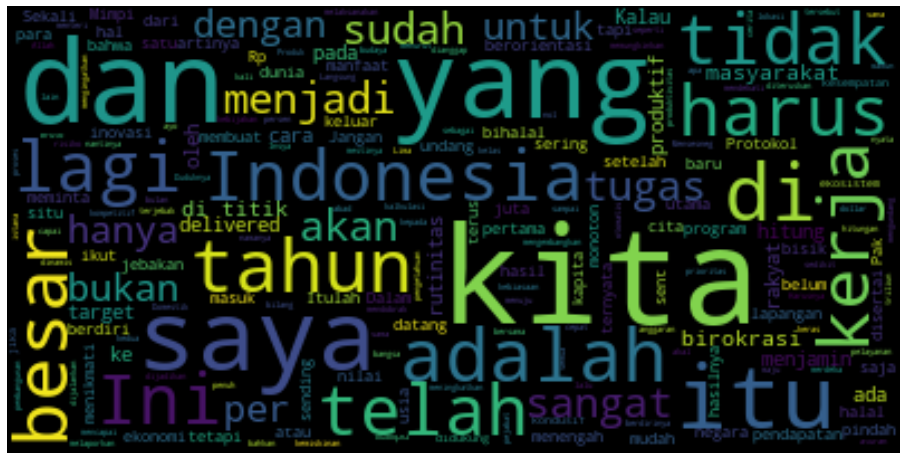

In [12]:
from wordcloud import WordCloud

wordcloud = WordCloud(max_font_size=60).generate(teks_indo)
plt.figure(figsize=(16,12))

'''plot wordcloud in matplotlib'''

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [14]:
count = {} #cunt akan menghasilkan pasangan kata dengan jumlah
for w in normalized.split():
    if w in count:
        count[w] += 1
    else:
        count[w] = 1
for word, times in count.items():
    if times > 3:
        print("%s was found %d times" % (word, times))#kata-kata yg muncul sekurang -kurangnya empat

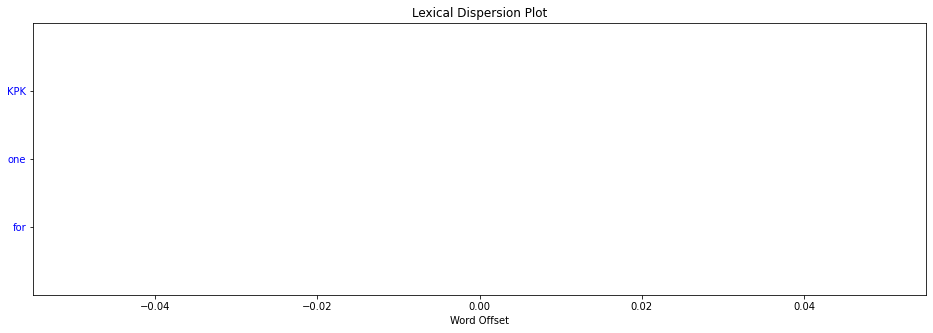

In [15]:
plt.figure(figsize=(16,5))
topics = ['KPK','one','for']
nltk.Text("""One of the candidates for leadership of the Corruption Eradication Commission (KPK), Insp. Gen. Dharma Pongrekun, is criticizing the vitriolic attitude toward candidates who have yet to submit their wealth reports to the commission. 

The wealth report (LHKPN) is one of the requirements to be fulfilled by the candidates as stipulated in the 1999 Good Governance and Freedom from Corruption, Collusion and Nepotism Law as well as in the 2002 KPK Law. 

However, some of the candidates for KPK leadership passed the selection without submitting their wealth reports, arousing criticism from other institutions.

To Dharma, the polemic revolving around the wealth report submission only reveals dislike for candidates who have passed the selection.

“If they criticize this out of dislike, then what is there to discuss? I don’t think this attitude is aligned with Pancasila,” Dharma said on Thursday, referring to the nation’s ideology. He added that this matter should not be an issue in the first place, because adopting Pancasila values meant people should accept differences.

Dharma, however, did not specify what kind of differences he was talking about. He went on to say that he did not see anything wrong with candidates who had yet to submit their wealth reports.

“The wealth report is not relevant with the God’s law. Why? Because the concept is atheistic in its nature,” he said as quoted by kompas.com on Thursday. """).dispersion_plot(topics)

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package genesis to /root/nltk_data...
[nltk_data]   Package genesis is already up-to-date!
[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package nps_chat to /root/nltk_data...
[nltk_data]   Package nps_chat is already up-to-date!
[nltk_data] Downloading package webtext to /root/nltk_data...
[nltk_data]   Package webtext is already up-to-date!
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.
*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of

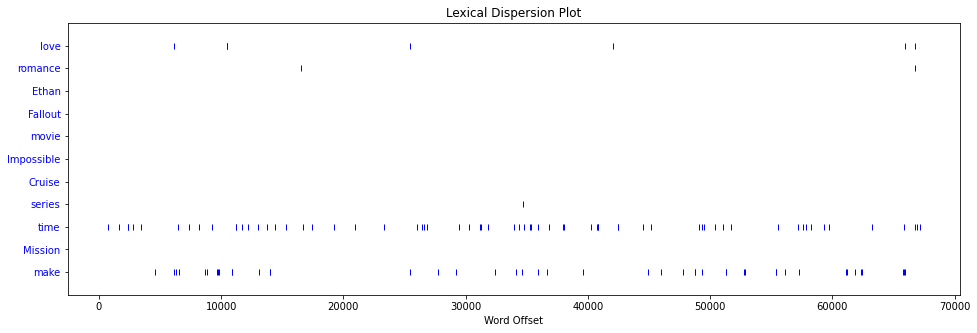

In [22]:
import nltk
nltk.download('gutenberg')
nltk.download('genesis')
nltk.download('inaugural')
nltk.download('nps_chat')
nltk.download('webtext')
nltk.download('treebank')
  
from nltk.book import text9 as content
plt.figure(figsize=(16,5))
topics = ['love','romance','Ethan', 'Fallout','movie', 'Impossible', 'Cruise', 'series', 'time', 'Mission', 'make']
content.dispersion_plot(topics)

In [23]:
teks_english = """Facebook CEO Mark Zuckerberg has said political advertising is not a major source of revenue but adds that he believes it is important to allow everyone a voice, and that banning political ads would favor incumbents.
Dorsey said he disagreed with Zuckerberg is assessment.
We have witnessed many social movements reach massive scale without any political advertising. I trust this will only grow, he added.The Trump conundrum
Social media platforms have been challenged by President Donald Trump campaign and its use of ads that contain claims critics say have been debunked by independent fact-checkers.
Twitter just walked away from hundreds of millions of dollars of potential revenue, a very dumb decision for their stockholders," Trump 2020 campaign manager Brad Parscale said.
Will Twitter also be stopping ads from biased liberal media outlets who will now run unchecked as they buy obvious political content meant to attack Republicans?
Democrats have stepped up pressure on Facebook to remove political ads, and a group of employees has also called for stronger efforts by the social network to clamp down on civic misinformation from politicians.
Outside of the Trump campaign, initial reaction to the Twitter announcement was positive.
Until privately-owned social media platforms can develop and consistently enforce standards to prevent demonstrably inaccurate information in political advertising, this is the right move,said Michelle Amazeen, a Boston University professor specializing in political communication.
Nina Jankowicz, a Wilson Center fellow specializing in disinformation, also welcomed the decision.
Its great that this move has been made globally and not just within the United States, she said
Too often these companies operate in a cloud of willful ignorance about the effects their products have outside our borders.
Jankowicz said the decision could level the playing field by preventing wealthier candidates and groups dominating the social conversation.
Paid speech essentially quashes some groups ability to speak out and be heard because they cant compete with the reach that their richer counterparts pay for, she said.
More cautiously, eMarketer senior analyst Jasmine Enberg said it remained unclear how much impact the change would have, given that political advertising is not a major part of Twitters core business.And given the nature of the platform, people, publishers and politicians will still use Twitter to discuss politics organically, meaning that it won't fully solve the problem of misinformation, Enberg said.
Syracuse University professor Jennifer Grygiel also was skeptical, noting in a tweet: Twitter has promised lots of things in the past that they havent delivered on. 
We have to wait and see how effective the new political policy will be.
Twitters chief financial officer Ned Segal said the move would have little financial impact.
Since we are getting questions: This decision was based on principle, not money, he said. As context, weve disclosed that political ad spend for the 2018 US midterms was (less than) $3M."""

In [24]:
teks_english

'Facebook CEO Mark Zuckerberg has said political advertising is not a major source of revenue but adds that he believes it is important to allow everyone a voice, and that banning political ads would favor incumbents.\nDorsey said he disagreed with Zuckerberg is assessment.\nWe have witnessed many social movements reach massive scale without any political advertising. I trust this will only grow, he added.The Trump conundrum\nSocial media platforms have been challenged by President Donald Trump campaign and its use of ads that contain claims critics say have been debunked by independent fact-checkers.\nTwitter just walked away from hundreds of millions of dollars of potential revenue, a very dumb decision for their stockholders," Trump 2020 campaign manager Brad Parscale said.\nWill Twitter also be stopping ads from biased liberal media outlets who will now run unchecked as they buy obvious political content meant to attack Republicans?\nDemocrats have stepped up pressure on Facebook t

In [25]:
import re
my_new_text = re.sub('[^ a-zA-Z0-9]', '', teks_english)

In [26]:
print("My Previous Text")
print("----------------")
print(teks_english)
print("----------------")
print("My New Text")
print("----------------")
print(my_new_text)

My Previous Text
----------------
Facebook CEO Mark Zuckerberg has said political advertising is not a major source of revenue but adds that he believes it is important to allow everyone a voice, and that banning political ads would favor incumbents.
Dorsey said he disagreed with Zuckerberg is assessment.
We have witnessed many social movements reach massive scale without any political advertising. I trust this will only grow, he added.The Trump conundrum
Social media platforms have been challenged by President Donald Trump campaign and its use of ads that contain claims critics say have been debunked by independent fact-checkers.
Twitter just walked away from hundreds of millions of dollars of potential revenue, a very dumb decision for their stockholders," Trump 2020 campaign manager Brad Parscale said.
Will Twitter also be stopping ads from biased liberal media outlets who will now run unchecked as they buy obvious political content meant to attack Republicans?
Democrats have steppe

In [27]:
stop_words = set(stopwords.words('english'))
lemma = WordNetLemmatizer()
word_tokens = word_tokenize(str(my_new_text)) 

#stopword removal
filtered_sentence = [w for w in word_tokens if not w in stop_words]

#lemmatization
normalized = " ".join(lemma.lemmatize(word) for word in filtered_sentence)

In [28]:
from nltk import ngrams
n = 2
total_grams = []
number_of_grams = ngrams(normalized.split(), n)
for grams in number_of_grams:
    total_grams.append(grams)

In [29]:
print(total_grams[:10])

[('Facebook', 'CEO'), ('CEO', 'Mark'), ('Mark', 'Zuckerberg'), ('Zuckerberg', 'said'), ('said', 'political'), ('political', 'advertising'), ('advertising', 'major'), ('major', 'source'), ('source', 'revenue'), ('revenue', 'add')]


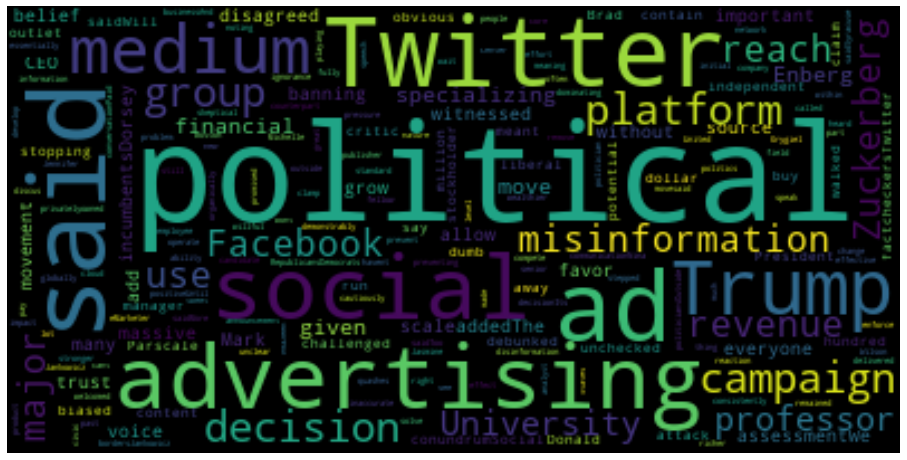

In [30]:
from wordcloud import WordCloud

wordcloud = WordCloud(max_font_size=60).generate(normalized)
plt.figure(figsize=(16,12))

'''plot wordcloud in matplotlib'''

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()